In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist, squareform

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.25
rng = np.random.default_rng(42)

In [19]:
# Questão 7

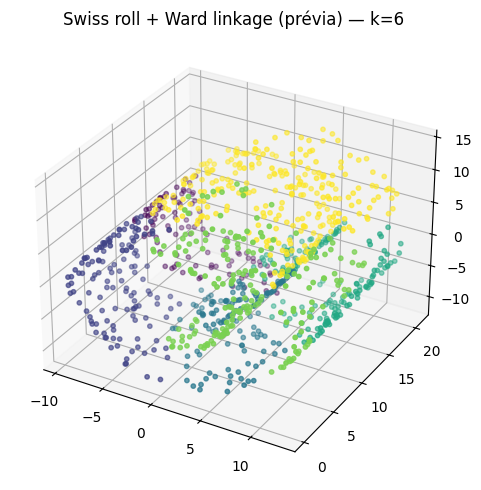

In [20]:
X, _ = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

X_scaled = StandardScaler().fit_transform(X)

Z = linkage(X_scaled, method="ward")

k_preview = 6
labels_k = fcluster(Z, t=k_preview, criterion="maxclust")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_k, s=10)
ax.set_title(f"Swiss roll + Ward linkage (prévia) — k={k_preview}")
plt.tight_layout(); plt.show()

In [21]:
# Questão 8

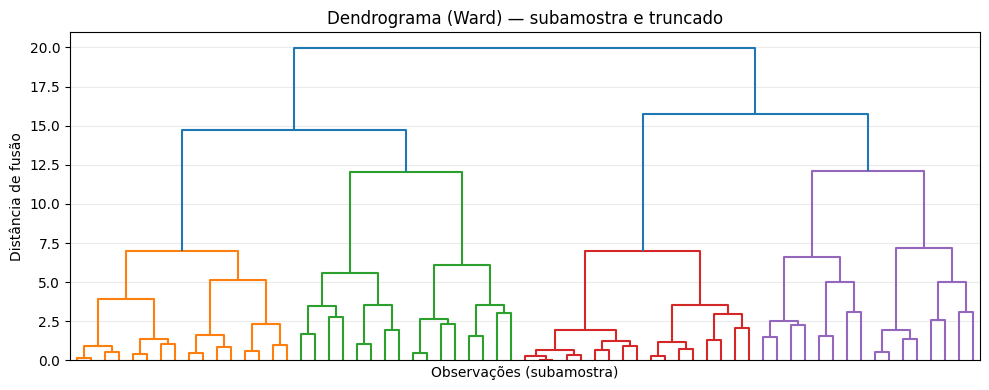

In [22]:
sub_n = 300
idx = rng.choice(len(X_scaled), size=sub_n, replace=False)
X_sub = X_scaled[idx]

# linkage da subamostra
Z_sub = linkage(X_sub, method="ward")

plt.figure(figsize=(10, 4))
dendrogram(Z_sub, truncate_mode="level", p=5, no_labels=True)
plt.title("Dendrograma (Ward) — subamostra e truncado")
plt.xlabel("Observações (subamostra)")
plt.ylabel("Distância de fusão")
plt.tight_layout(); plt.show()

In [23]:
# Questão 9

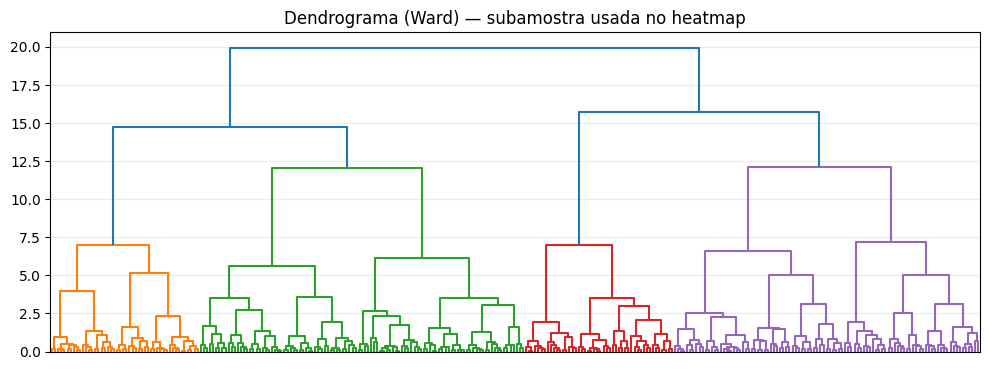

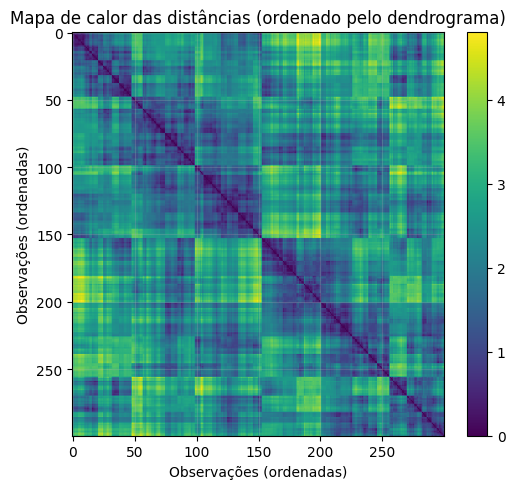

In [24]:
plt.figure(figsize=(10, 3.8))
dend = dendrogram(linkage(X_sub, method="ward"), no_labels=True)
plt.title("Dendrograma (Ward) — subamostra usada no heatmap")
plt.tight_layout(); plt.show()

# matriz de distâncias euclidianas e reordenação pela ordem das folhas
D = squareform(pdist(X_sub, metric="euclidean"))
leaf_order = dend["leaves"]
D_ord = D[np.ix_(leaf_order, leaf_order)]

# heatmap simples (blocos mais escuros = mais próximos)
plt.figure(figsize=(5.5, 5))
plt.imshow(D_ord, aspect="auto")
plt.title("Mapa de calor das distâncias (ordenado pelo dendrograma)")
plt.xlabel("Observações (ordenadas)"); plt.ylabel("Observações (ordenadas)")
plt.colorbar(); plt.tight_layout(); plt.show()

In [25]:
# Questão 10

O dendrograma, mesmo truncado, já mostra blocos que se unem em níveis de distância parecidos, o que indica grupos relativamente compactos. No mapa de calor, isso aparece como blocos mais escuros na diagonal (observações mais próximas). Juntando as duas visões, a estrutura do swiss roll não é totalmente “esférica”, mas o Ward ainda consegue formar clusters razoavelmente coesos.

In [26]:
# Questão 11

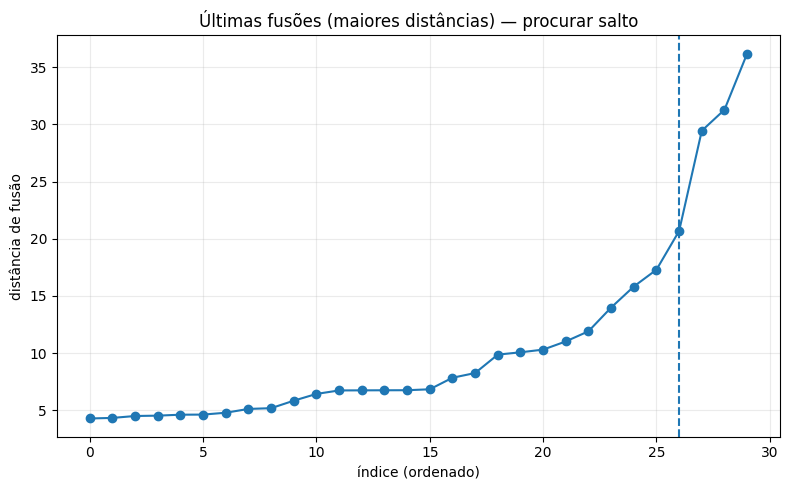

Distância de corte sugerida (entre os dois maiores níveis): 25.058
Número de clusters estimado por este critério: k = 4


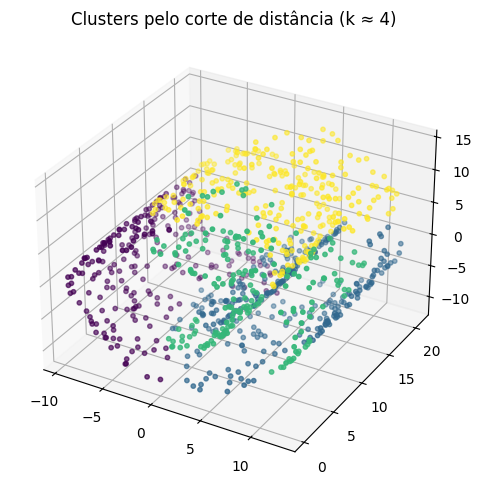

In [27]:
# olharemos os "últimos" níveis de fusão (distâncias de Z) e procuramos um salto grande (cotovelo)
dists = Z[:, 2]
last = 30 if len(dists) >= 30 else len(dists) - 1
tail = np.sort(dists)[-last:]
gaps = np.diff(tail)

# posição do maior salto
i_max = np.argmax(gaps)
# limiar de corte entre os dois níveis que mais "pularam"
thr = (tail[i_max] + tail[i_max + 1]) / 2.0

# número de clusters ao cortar na distância "thr"
labels_thr = fcluster(Z, t=thr, criterion="distance")
k_est = len(np.unique(labels_thr))

plt.figure()
plt.plot(range(len(tail)), tail, marker="o")
plt.axvline(i_max, linestyle="--")
plt.title("Últimas fusões (maiores distâncias) — procurar salto")
plt.xlabel("índice (ordenado)"); plt.ylabel("distância de fusão")
plt.tight_layout(); plt.show()

print(f"Distância de corte sugerida (entre os dois maiores níveis): {thr:.3f}")
print(f"Número de clusters estimado por este critério: k = {k_est}")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_thr, s=10)
ax.set_title(f"Clusters pelo corte de distância (k ≈ {k_est})")
plt.tight_layout(); plt.show()

In [28]:
# Questão 12

Com base no gráfico das últimas fusões, o maior salto ocorreu em torno da distância 25, indicando um ponto natural de corte na árvore hierárquica. A partir desse limiar, o modelo sugeriu a formação de quatro clusters. Observando o gráfico 3D, essa divisão faz sentido, já que o swiss roll ficou segmentado em quatro blocos maiores ao longo da espiral. Isso confirma que o número de clusters estimado está coerente com a estrutura visual do conjunto de dados. Ademais, descata-se que, no caso do swiss roll, não existe um “número verdadeiro” de clusters, visto que diferentes cortes podem ser razoáveis dependendo do nível de granularidade desejado. Ainda assim, o resultado obtido pelo critério do salto parece consistente e bem alinhado com a expectativa para esse tipo de dado.